In [127]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import math

In [276]:
user_dict = {}
user_list = [[],[],[],[],[]]

with open('checkin_dataset.csv', newline='') as f:
    checkin = csv.reader(f)
    for line in checkin:
        if line[0] != '':
            l = line[2:] + [line[0]]
            l[0] = datetime.strptime(l[0], '%Y-%m-%d %H:%M:%S').timestamp()
            if line[1] in user_dict:
                user_dict[line[1]].append(l)
            else:
                user_dict[line[1]] = [l]
            ll = line[2].split(' ')
            user_list[0].append(datetime.strptime(line[2], '%Y-%m-%d %H:%M:%S'))
            user_list[1].append(float(line[3]))
            user_list[2].append(float(line[4]))
            user_list[3].append(datetime.strptime(ll[0], '%Y-%m-%d'))
            user_list[4].append(datetime.strptime(ll[1], '%H:%M:%S'))

In [101]:
user_np = {}
for user in user_dict:
    user_np[user] = np.array(user_dict[user])

[['1496940960.0' '0.894200053043' '0.811908780449' '32']
 ['1501075860.0' '0.916803053534' '0.77531959393' '33']
 ['1499376600.0' '0.918575384438' '0.795928522254' '34']
 ..., 
 ['1498555380.0' '0.966057706892' '1.28733989512' '25539']
 ['1495408260.0' '0.953959375527' '1.27795239473' '25540']
 ['1498126680.0' '0.942874780454' '1.29045744208' '25541']]


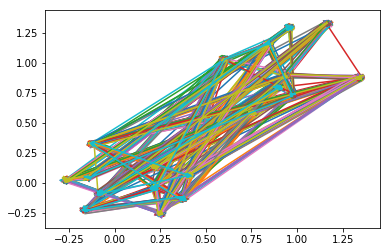

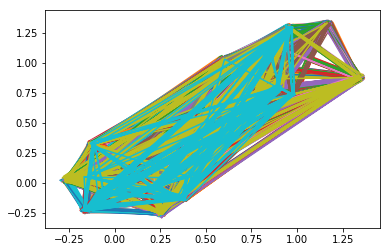

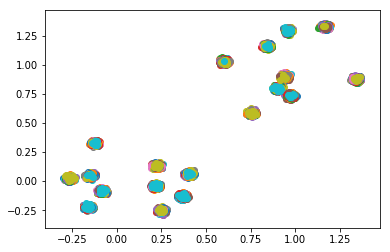

In [137]:
# I wanted to see how the paths looked

for k in user_np:
    plt.plot(user_np[k][:, 1], user_np[k][:, 2])
plt.show()

user_ts = {}

for k in user_np:
    ts = user_np[k][np.argsort(user_np[k][:, 0])]
    user_ts[k] = np.array(ts, dtype='float')
    plt.plot(ts[:, 1], ts[:, 2])
plt.show()

for k in user_np:
    ts = user_ts[k]
    plt.scatter(ts[:, 1], ts[:, 2])
plt.show()

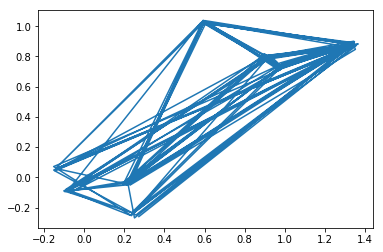

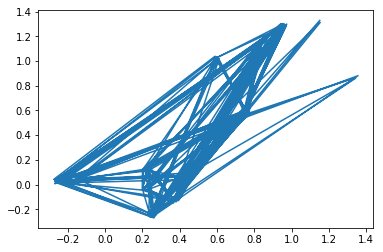

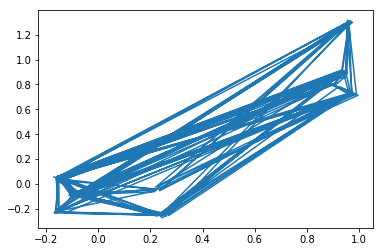

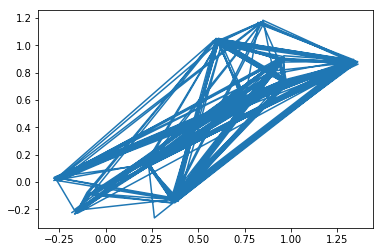

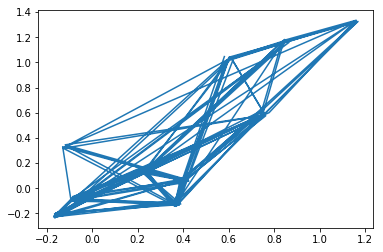

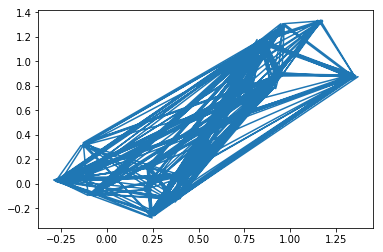

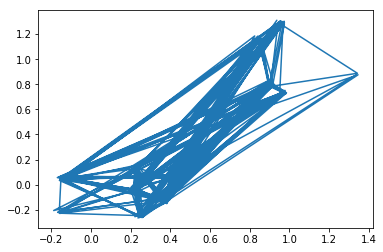

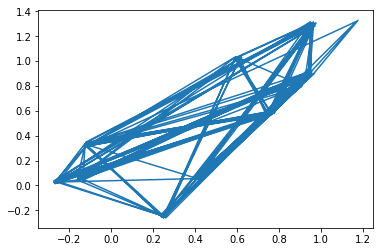

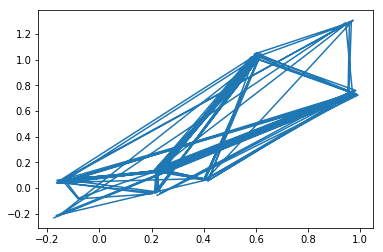

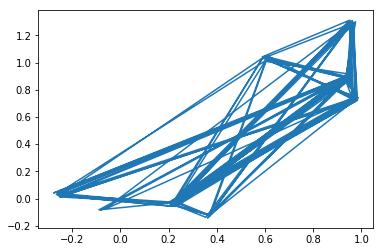

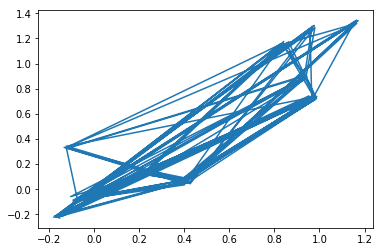

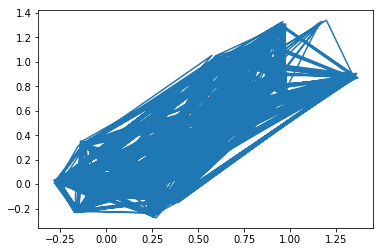

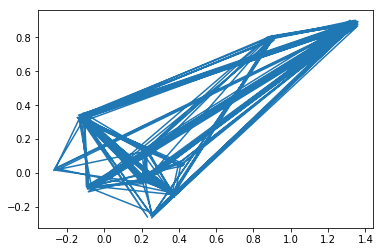

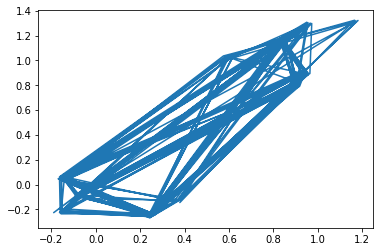

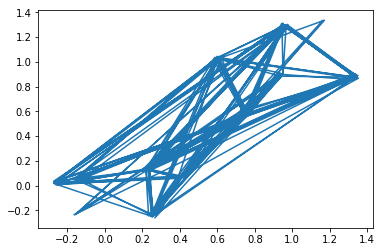

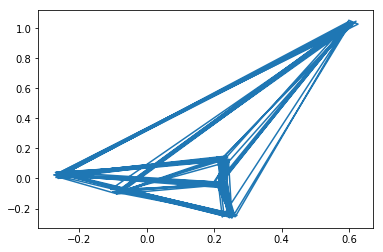

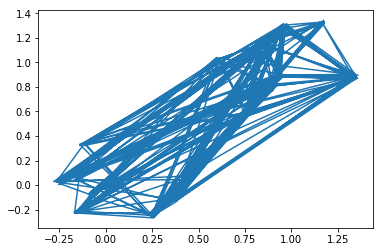

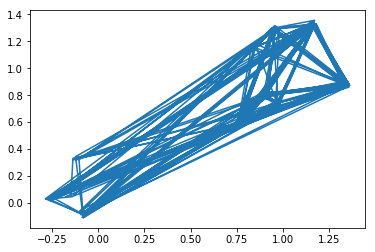

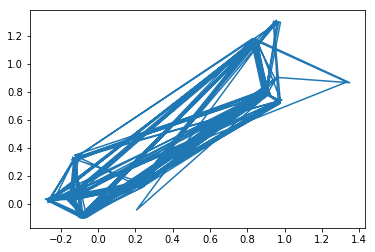

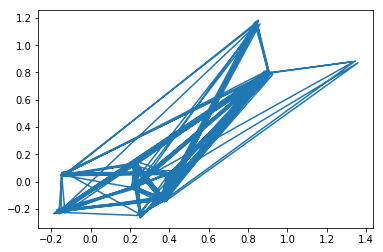

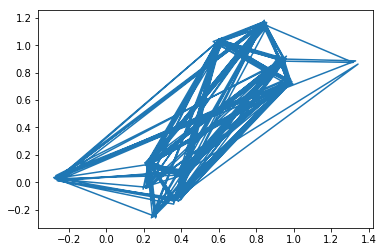

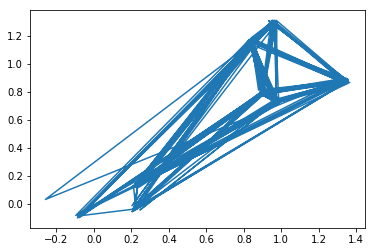

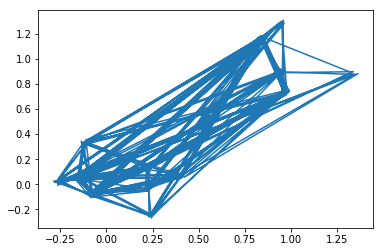

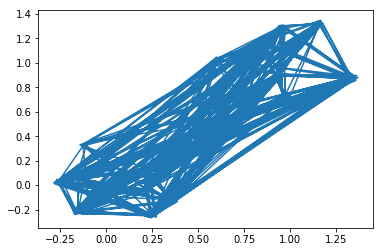

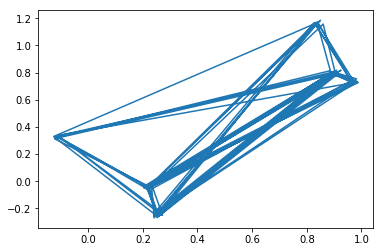

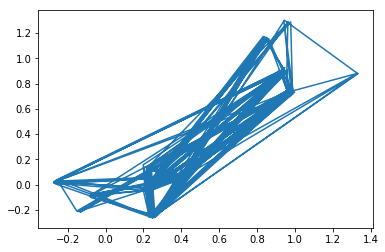

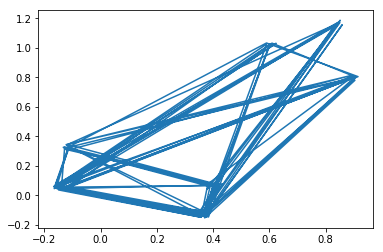

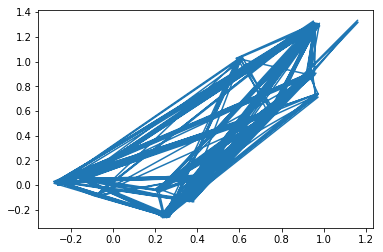

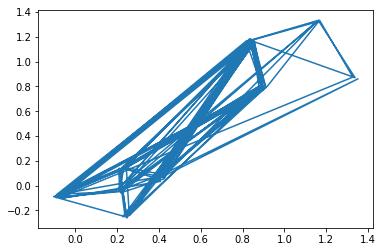

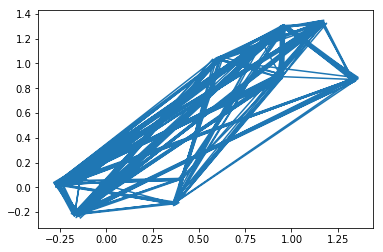

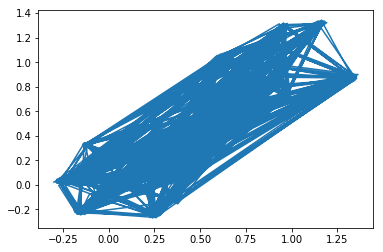

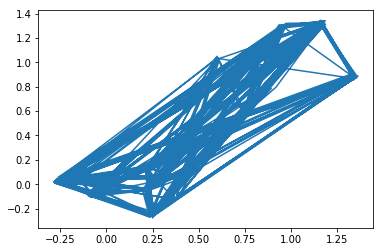

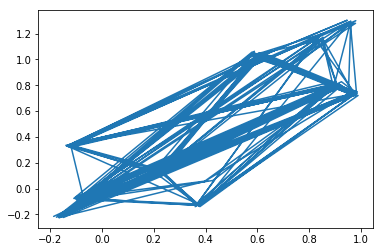

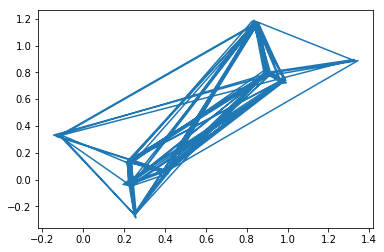

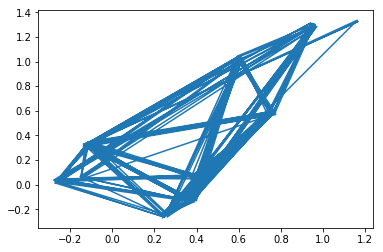

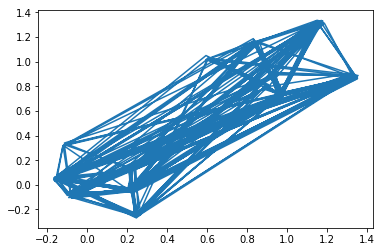

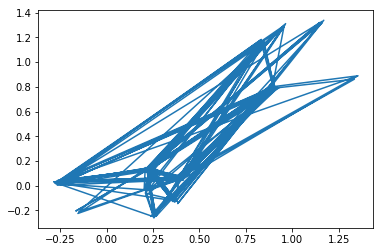

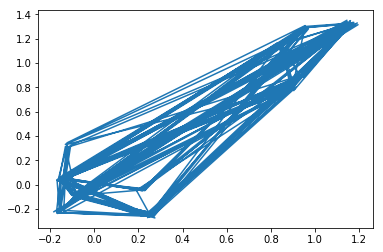

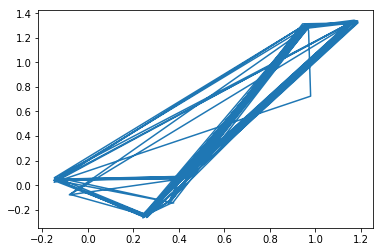

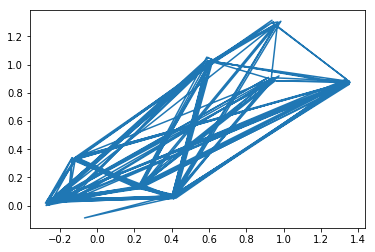

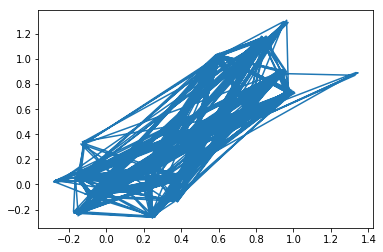

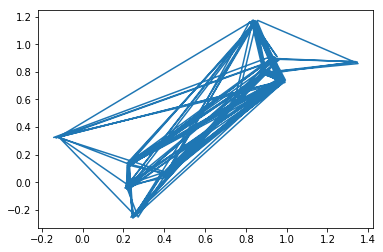

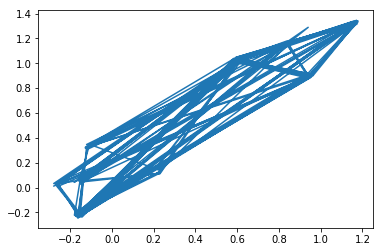

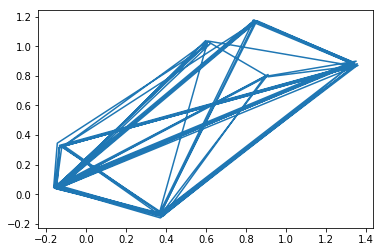

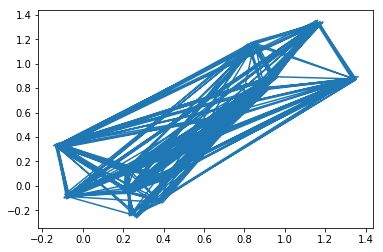

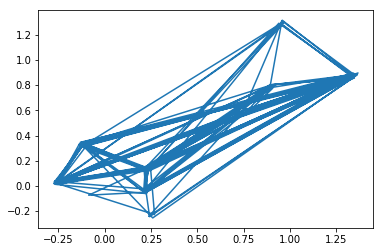

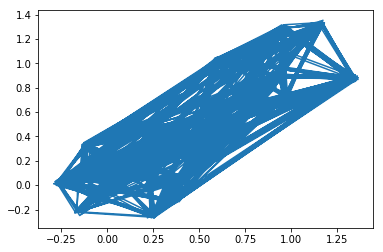

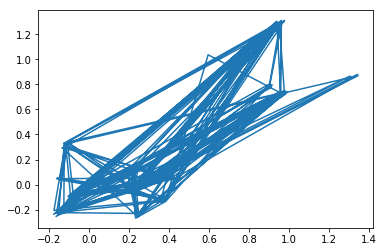

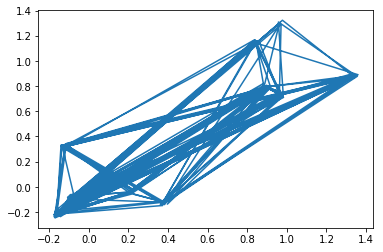

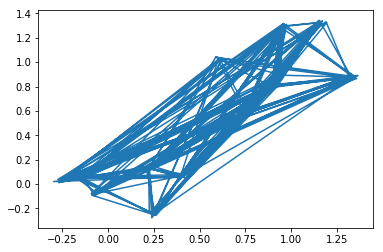

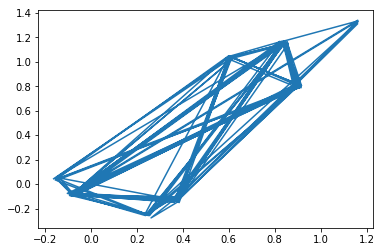

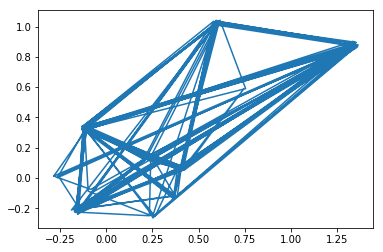

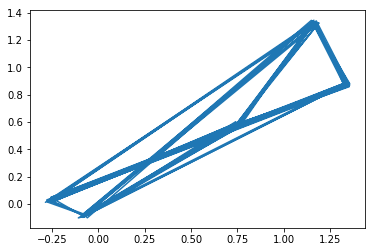

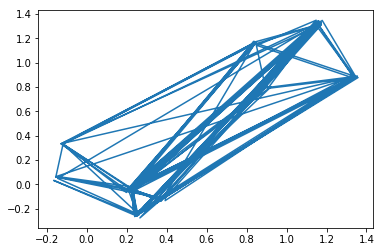

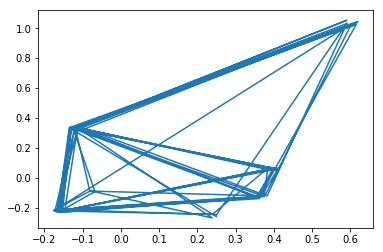

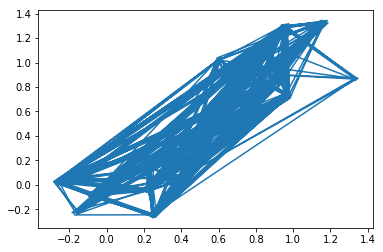

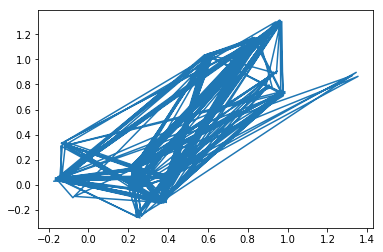

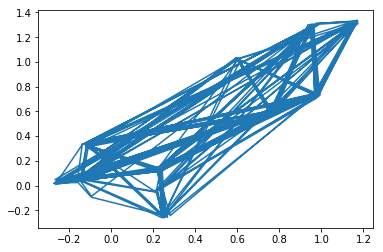

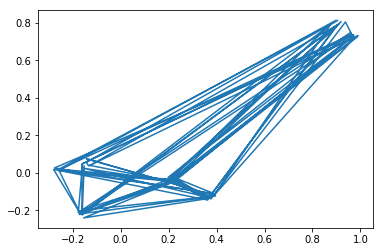

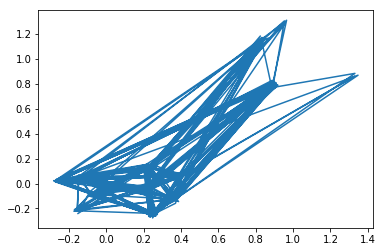

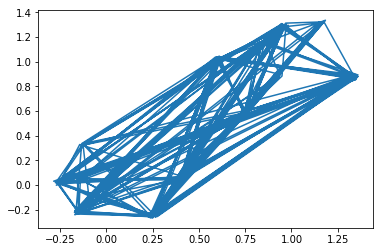

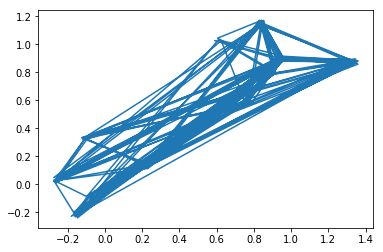

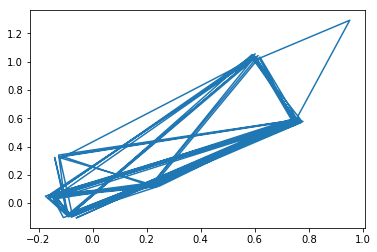

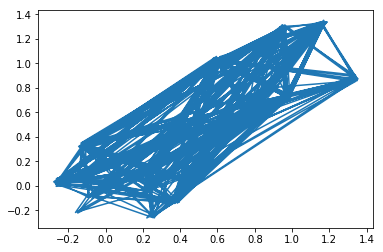

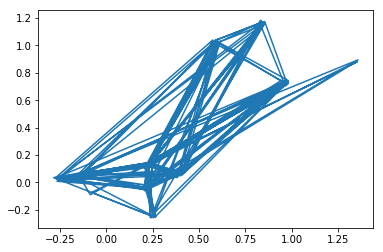

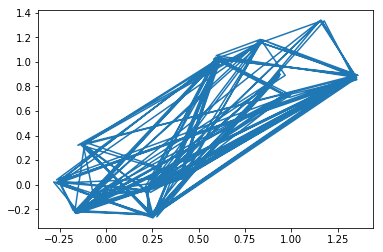

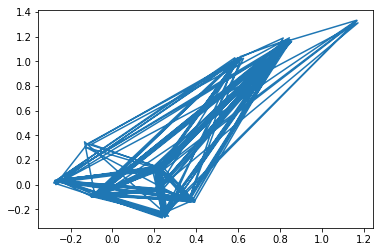

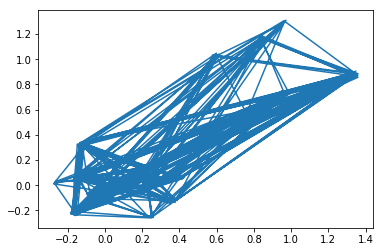

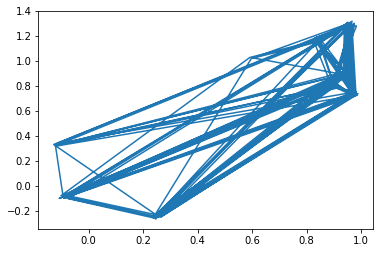

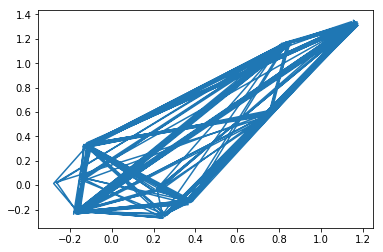

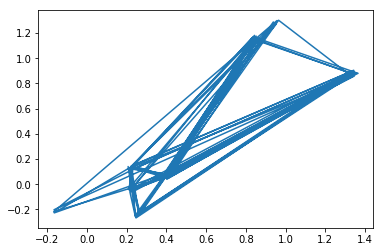

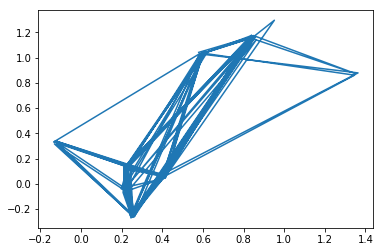

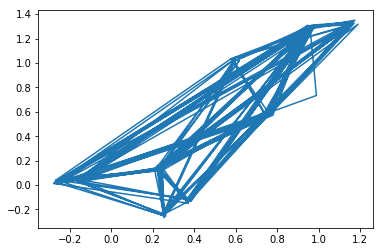

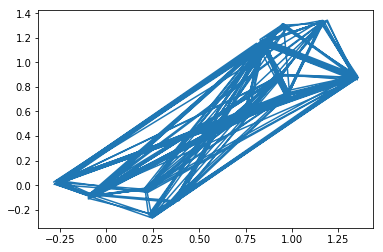

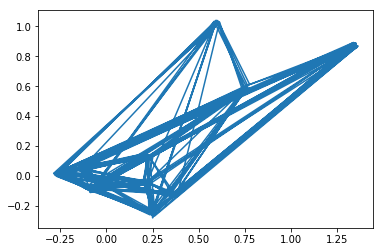

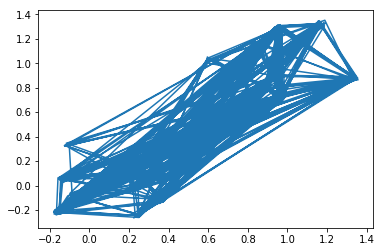

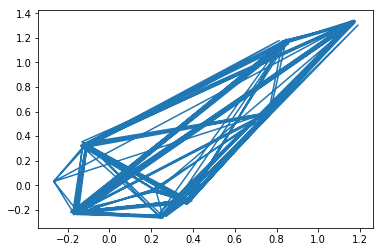

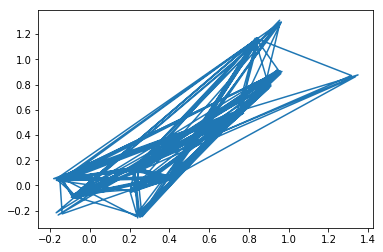

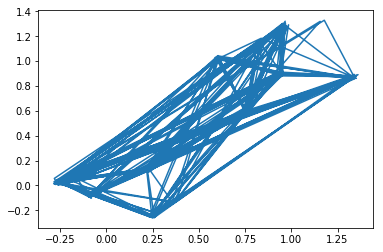

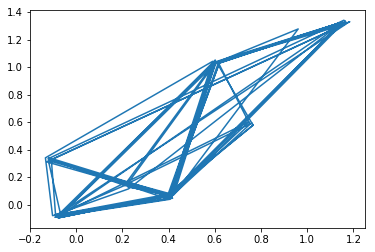

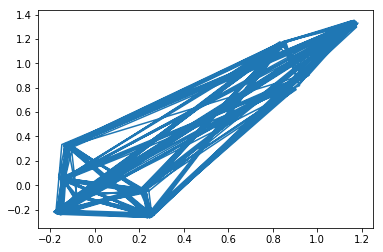

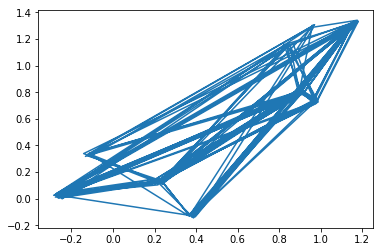

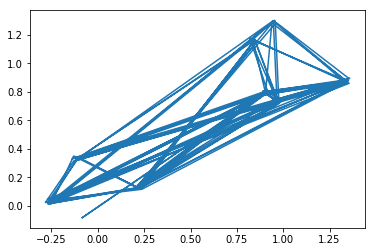

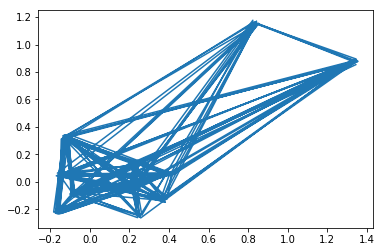

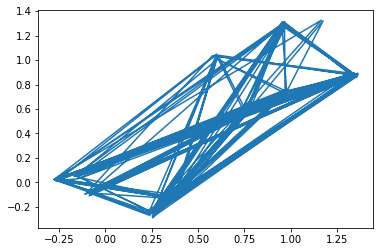

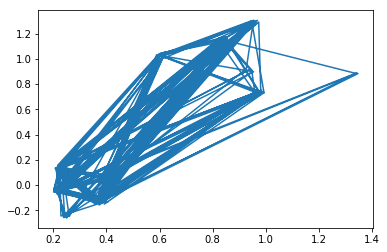

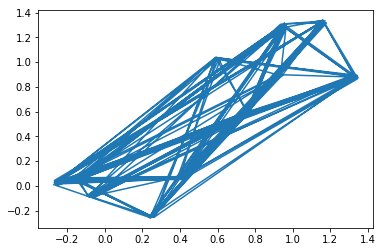

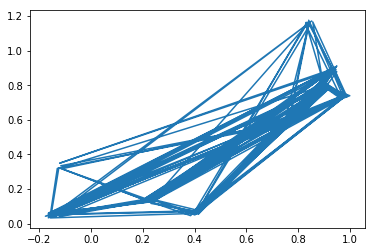

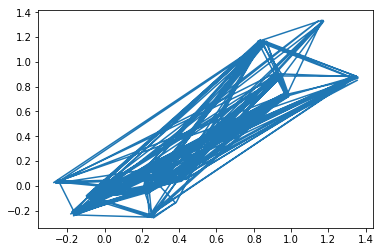

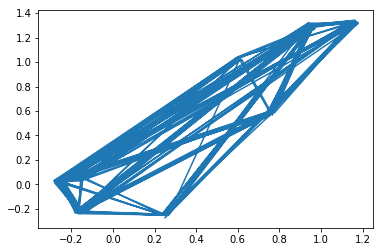

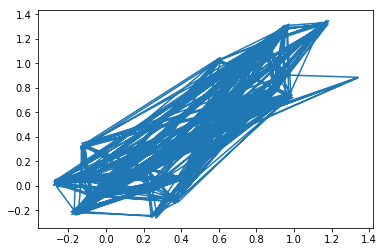

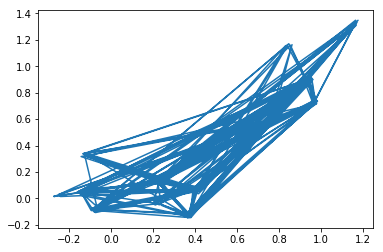

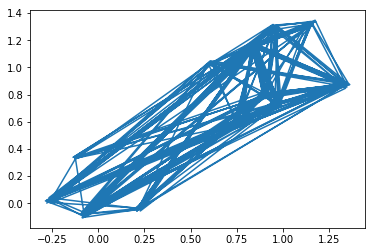

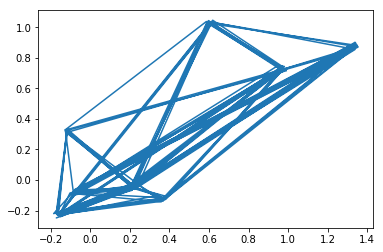

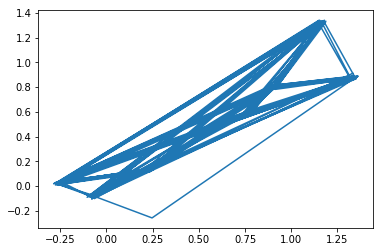

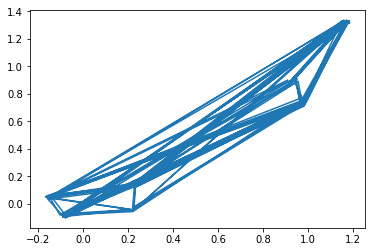

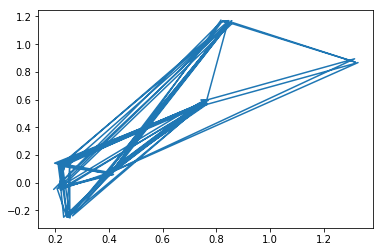

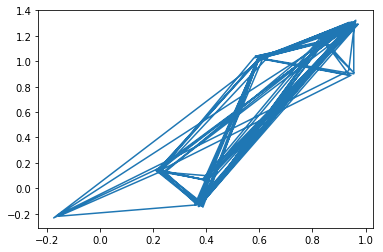

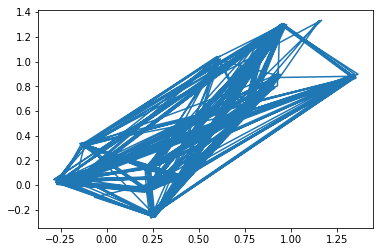

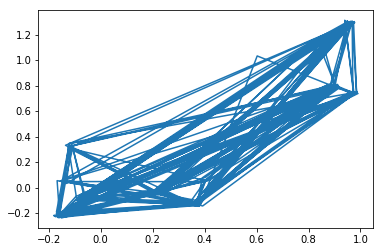

In [184]:
for k in user_np:
    ts = user_np[k][np.argsort(user_np[k][:, 0])]
    user_ts[k] = np.array(ts, dtype='float')
    plt.plot(ts[:, 1], ts[:, 2])
    plt.show()

{0: array([ 0.90127691,  0.79737293]), 1: array([-0.08194894, -0.08620216]), 2: array([ 1.16451548,  1.32698148]), 3: array([ 0.22556029,  0.13144752]), 4: array([ 0.75460606,  0.58496642]), 5: array([ 0.40497401,  0.06186446]), 6: array([ 1.34128524,  0.87740053]), 7: array([-0.12144009,  0.3275148 ]), 8: array([ 0.94116602,  0.89752275]), 9: array([ 0.37035595, -0.12870261]), 10: array([-0.16072998, -0.22126277]), 11: array([ 0.2179461 , -0.04084292]), 12: array([ 0.60229604,  1.02937116]), 13: array([ 0.24934742, -0.25020894]), 14: array([ 0.84164082,  1.16237725]), 15: array([ 0.97299631,  0.73286055]), 16: array([-0.26257763,  0.02409033]), 17: array([-0.14856268,  0.04881133]), 18: array([ 0.95818464,  1.29571618])}
[[ 0.90127691  0.79737293]
 [-0.08194894 -0.08620216]
 [ 1.16451548  1.32698148]
 [ 0.22556029  0.13144752]
 [ 0.75460606  0.58496642]
 [ 0.40497401  0.06186446]
 [ 1.34128524  0.87740053]
 [-0.12144009  0.3275148 ]
 [ 0.94116602  0.89752275]
 [ 0.37035595 -0.12870261

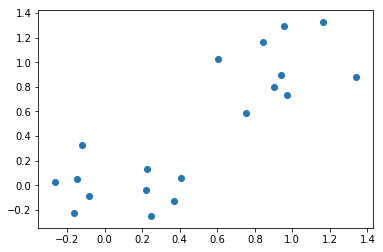

In [235]:
pos = []

# Taking advantage of how csv is organized
with open('checkin_dataset.csv', newline='') as f:
    checkin = csv.reader(f)
    for line in checkin:
        if line[0] != '':
            pos.append(line[3:])


p = np.array(pos, dtype='float')
"""
plt.plot(p[:, 0])
plt.show()
plt.plot(p[:, 1])
plt.show()
"""

clusters = {}
# cluster_list = []

c0 = None
seen = None

count = 0

for i in range(p.shape[0]):
    # I found the '.05' through trial abd error. There's certainly a better way to find it
    if c0 == None or abs(p[i, 0] - (c0 / (i-seen))) > .05 or i == p.shape[0] - 1:
        if c0 != None:
            clusters[count] = np.array([c0 /(i-seen), c1 /(i-seen)])
            # cluster_list.append(np.array([c0 /(i-seen), c1 /(i-seen)]))
            count += 1
        # print(count)
        seen = i
        c0 = 0
        c1 = 0
    c0 += p[i, 0]
    c1 += p[i, 1]

print(clusters)

cluster_array = np.zeros((len(clusters), 2))

for cluster in clusters:
    cluster_array[cluster] = clusters[cluster]

print(cluster_array)

plt.scatter(cluster_array[:, 0], cluster_array[:, 1])
plt.show()

[1313 1367  914 2205 1461 1558 1517  971 1219 1219  988 1603 1115 1334 1491
 1540 1333 1154 1366]
[[ 0.90127691  0.79737293]
 [-0.08194894 -0.08620216]
 [ 1.16451548  1.32698148]
 [ 0.22556029  0.13144752]
 [ 0.75460606  0.58496642]
 [ 0.40497401  0.06186446]
 [ 1.34128524  0.87740053]
 [-0.12144009  0.3275148 ]
 [ 0.94116602  0.89752275]
 [ 0.37035595 -0.12870261]
 [-0.16072998 -0.22126277]
 [ 0.2179461  -0.04084292]
 [ 0.60229604  1.02937116]
 [ 0.24934742 -0.25020894]
 [ 0.84164082  1.16237725]
 [ 0.97299631  0.73286055]
 [-0.26257763  0.02409033]
 [-0.14856268  0.04881133]
 [ 0.95818464  1.29571618]]


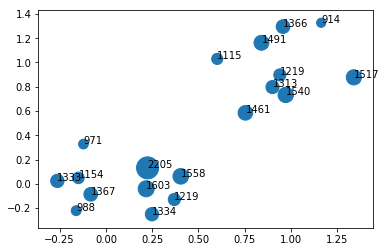

In [238]:
def find_cluster(entry, cs):
    cluster = 0
    best = np.sum(np.abs(entry - cs[0]))
    for i in range(1, len(cs)):
        if np.sum(np.abs(entry - cs[i])) < best:
            best = np.sum(np.abs(entry - cs[i]))
            cluster = i
    
    return cluster

cluster_visits = np.zeros(19, dtype='int32')


for i in range(p.shape[0]):
    c = find_cluster(p[i], clusters)
    cluster_visits[c] += 1
    

print(cluster_visits)
print(cluster_array)

plt.scatter(cluster_array[:, 0], cluster_array[:, 1], s = (cluster_visits ** 2) / 10000)
for i in range(19):
    plt.annotate(cluster_visits[i], (cluster_array[i, 0], cluster_array[i, 1]))
plt.show()

# print(np.array([cluster_array[:, 0], cluster_array[:, 1], cluster_visits]).T)


In [278]:
user_list.append([])
cluster_collection = {}
cc_time = {}
for i in range(len(user_list[0])):
    c = find_cluster(np.array([user_list[1][i], user_list[2][i]]), clusters)
    user_list[-1].append(c)
    if c in cluster_collection:
        cluster_collection[c].append(user_list[0][i])
        cc_time[c].append(user_list[4][i])
    else:
        cluster_collection[c] = [user_list[0][i]]
        cc_time[c] = [user_list[4][i]]

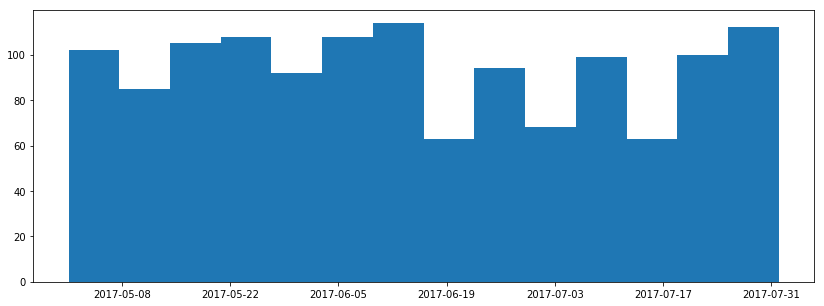

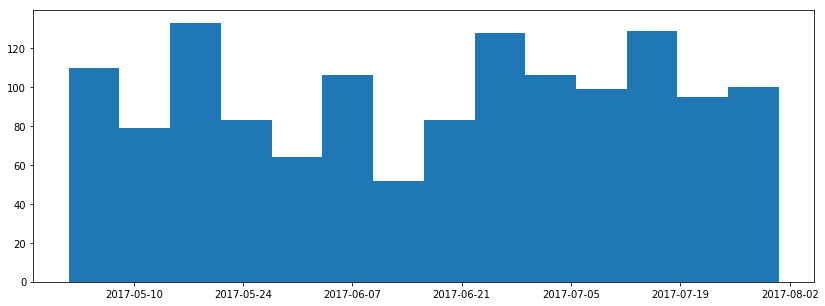

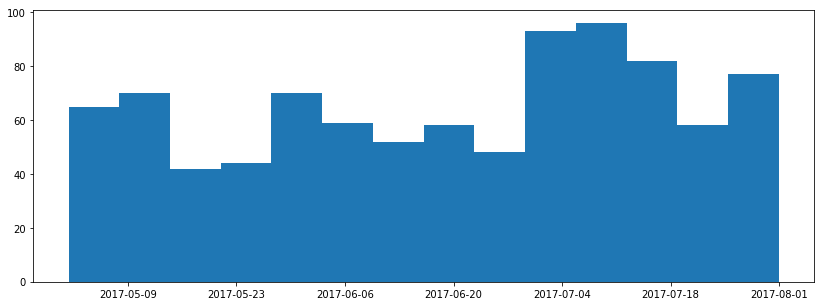

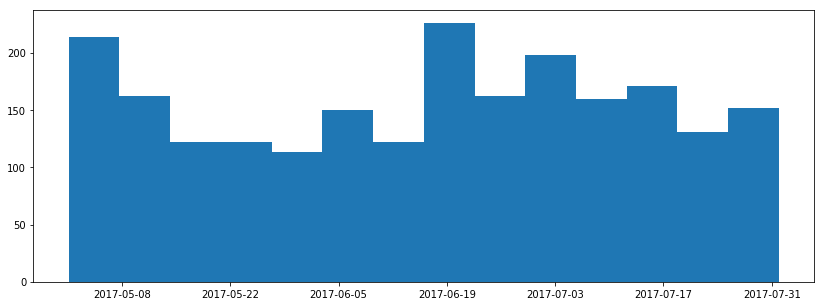

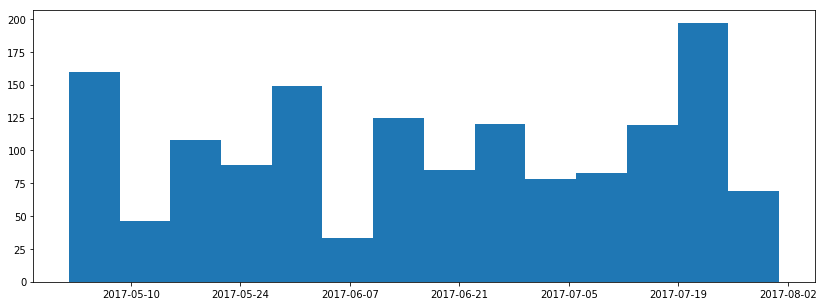

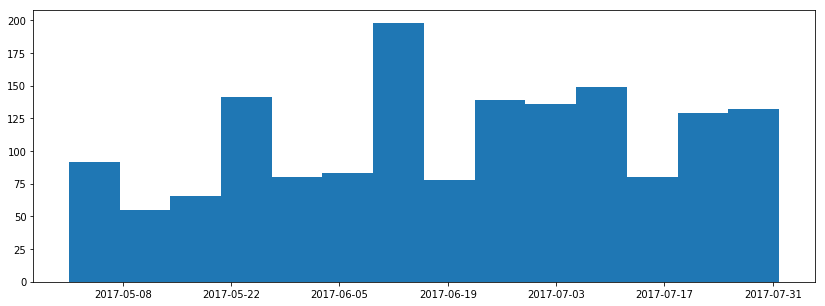

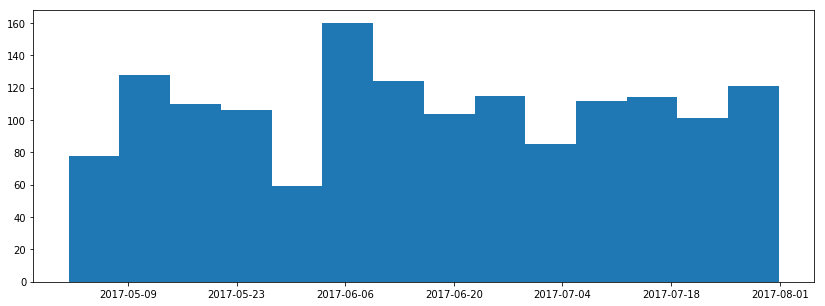

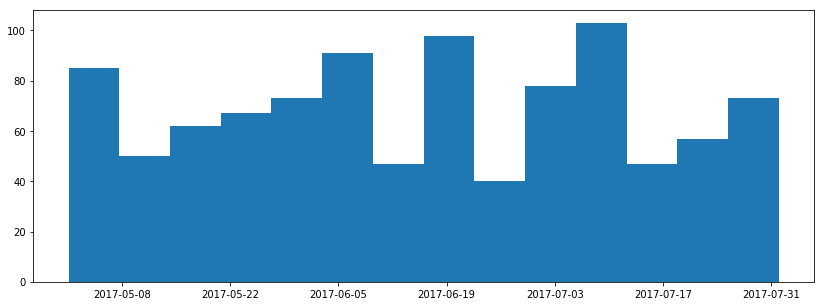

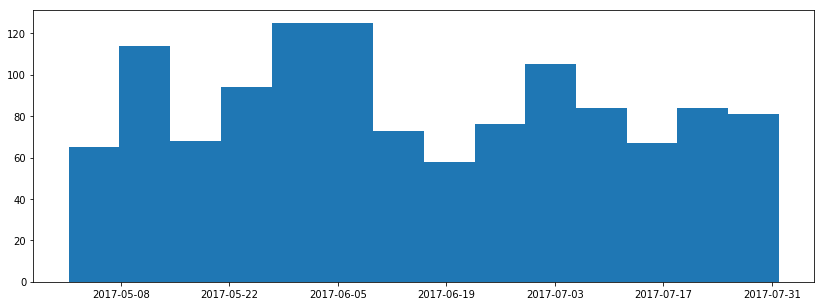

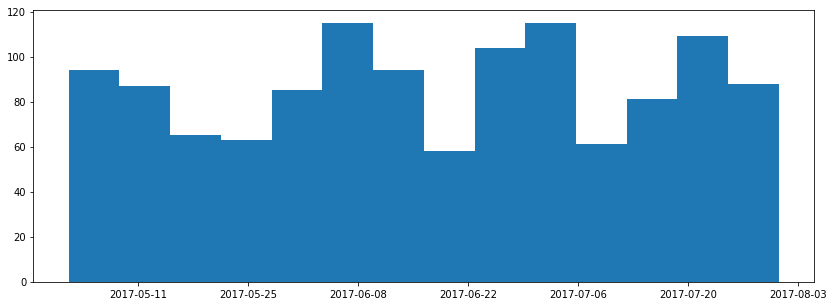

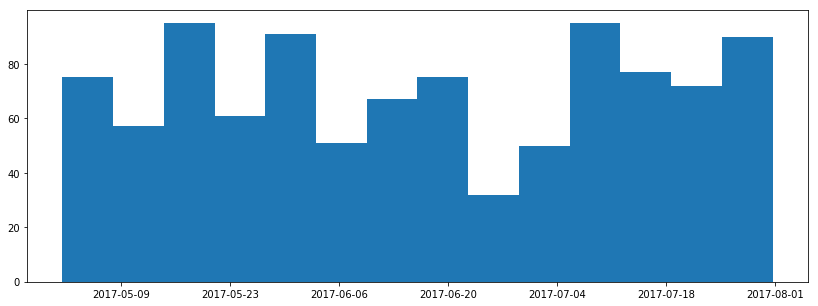

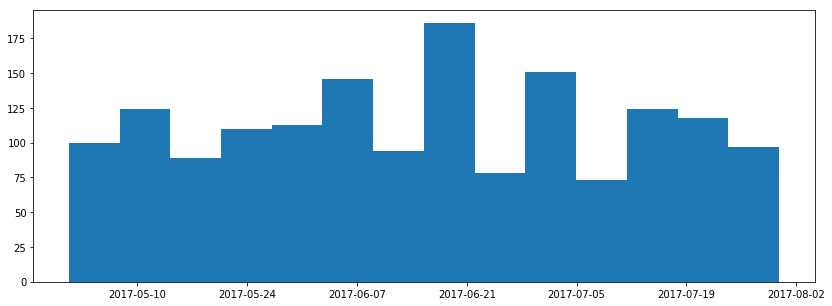

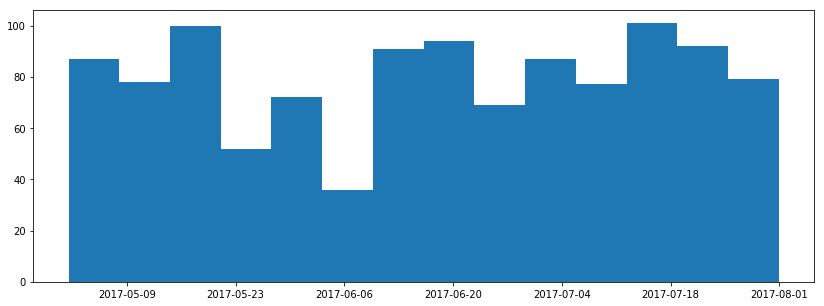

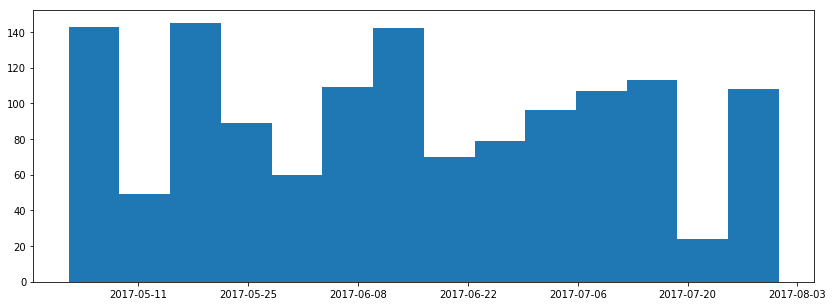

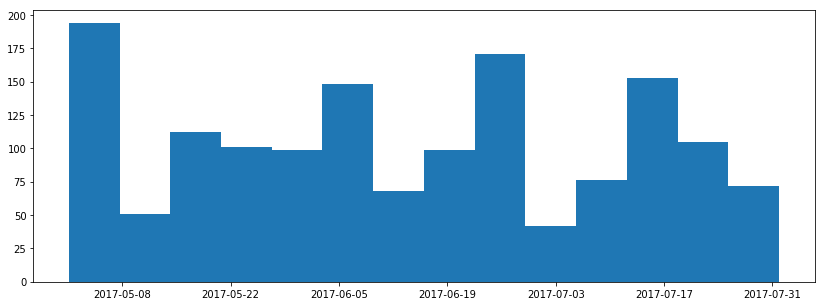

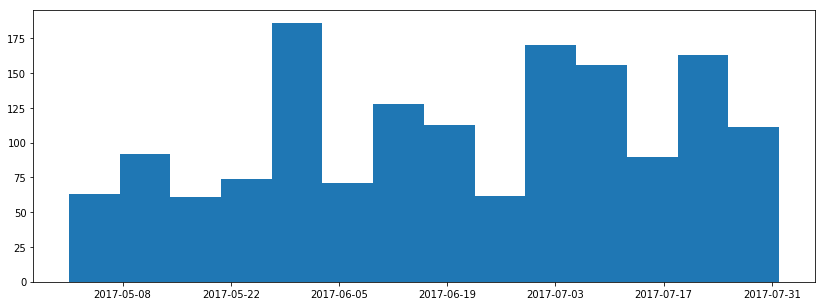

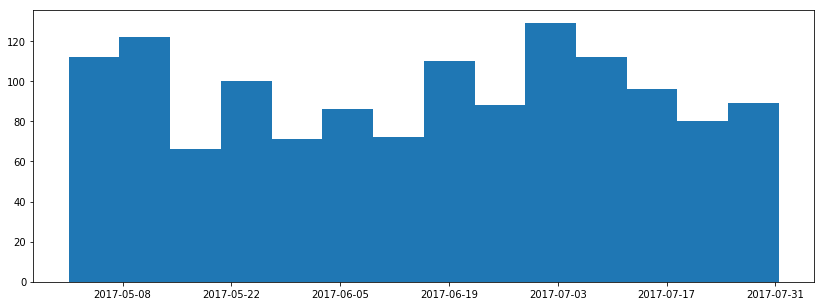

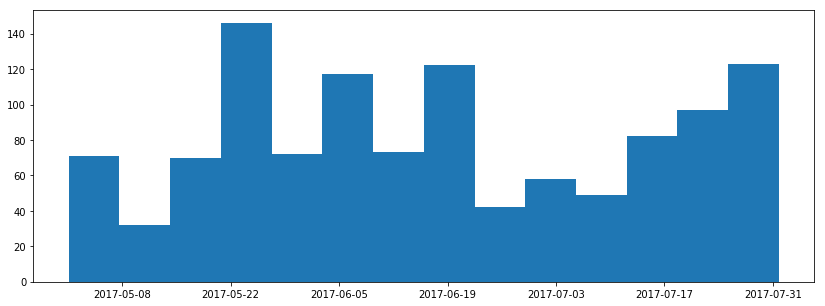

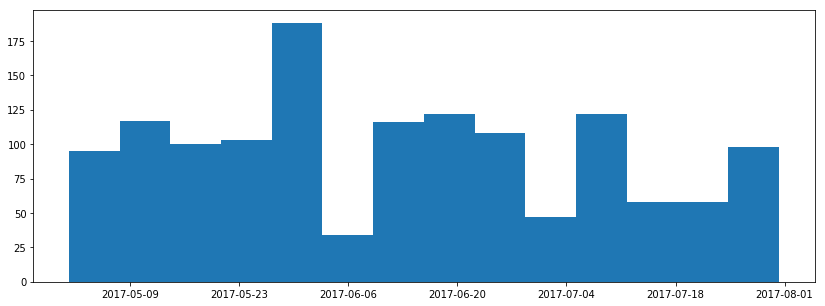

In [254]:
freqs = []
for i in range(19):
    plt.figure(figsize=(14,5))
    # (n, b, p) = plt.hist(cluster_collection[i], bins=27) # 27 bins because reasons?
    (n, b, p) = plt.hist(cluster_collection[i], bins=14) # 14 bins because ~ 14 weeks
    freqs.append(n)
    plt.show()

np_freqs = np.array(freqs)

from scipy import stats

r_coeffs = np.zeros((19, 19))

for i in range(19):
    for(j) in range(i, 19):
        if i != j:
            r_coeffs[i, j] = stats.pearsonr(freqs[i], freqs[j])[0]


[ 0.90127691  0.79737293]


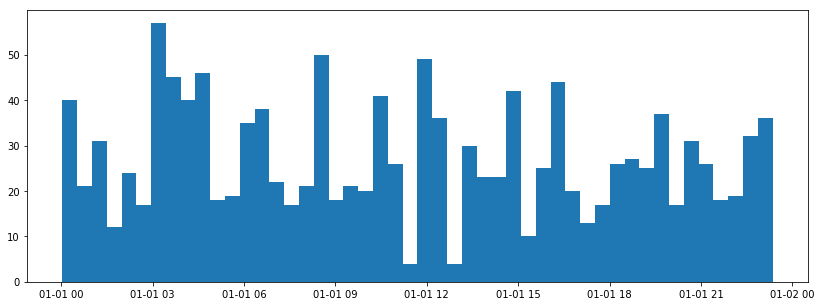

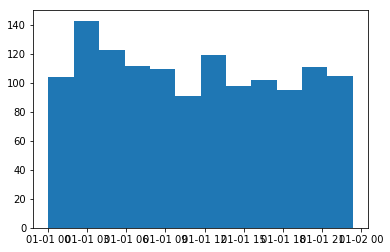

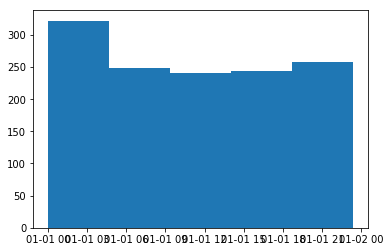

[-0.08194894 -0.08620216]


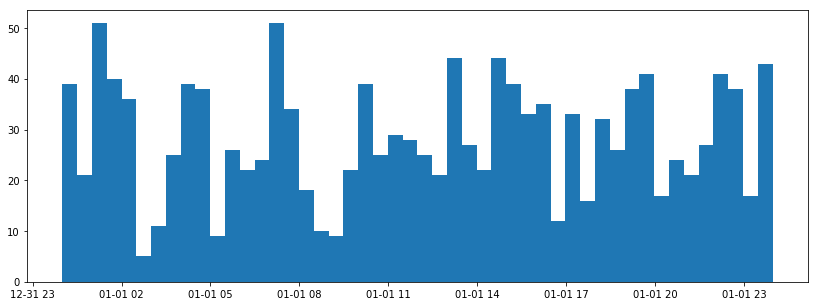

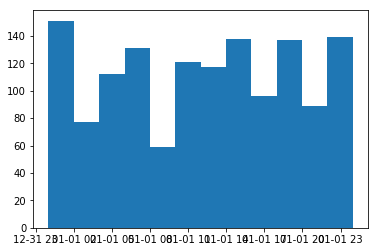

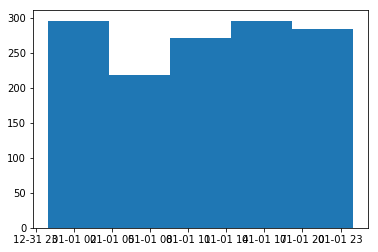

[ 1.16451548  1.32698148]


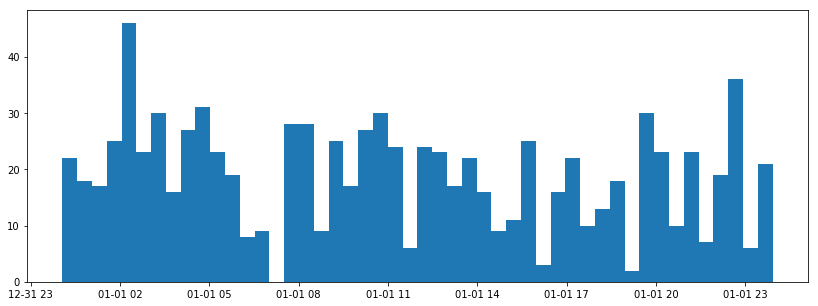

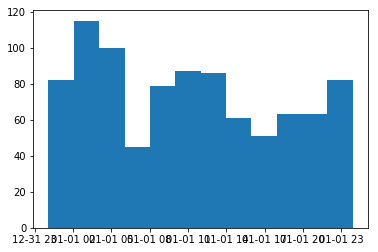

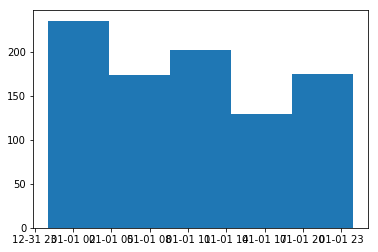

[ 0.22556029  0.13144752]


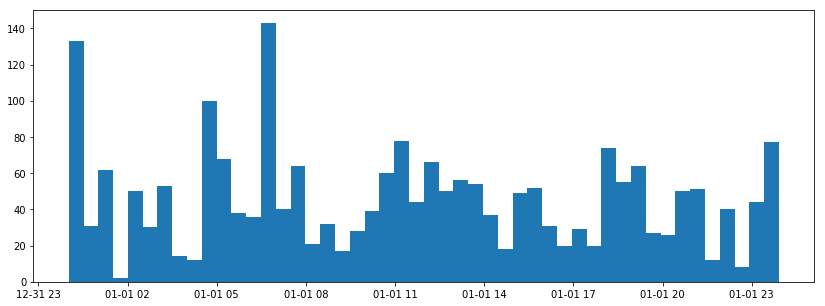

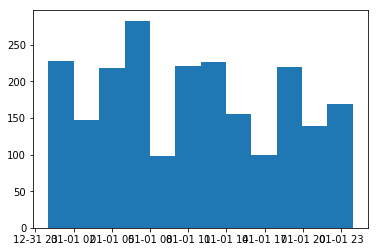

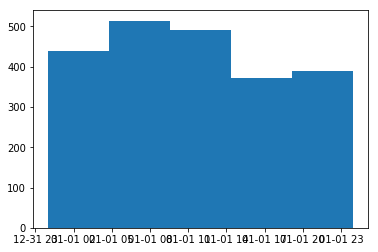

[ 0.75460606  0.58496642]


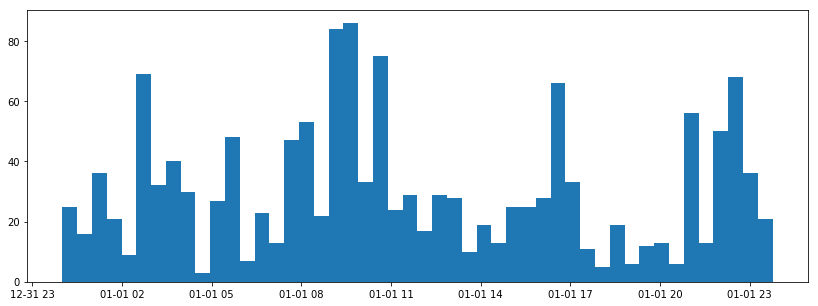

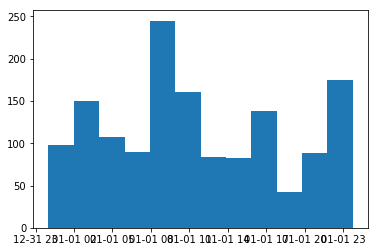

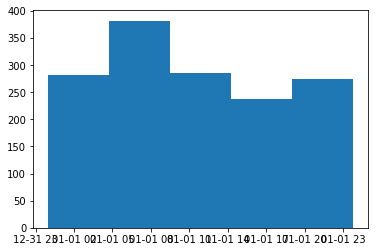

[ 0.40497401  0.06186446]


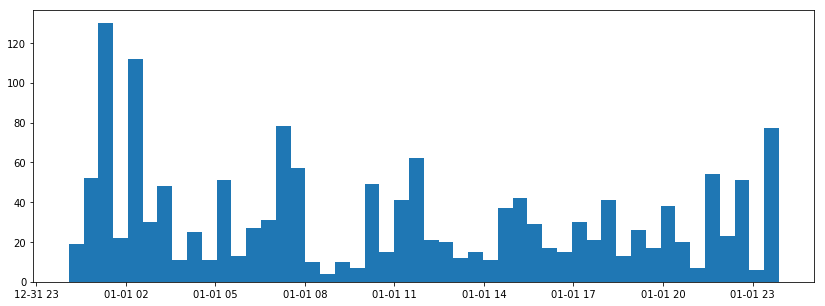

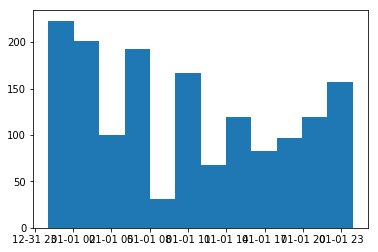

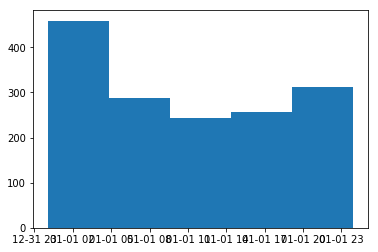

[ 1.34128524  0.87740053]


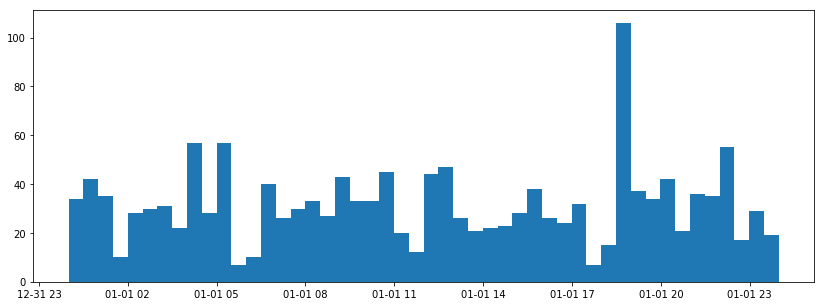

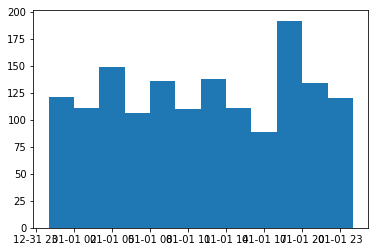

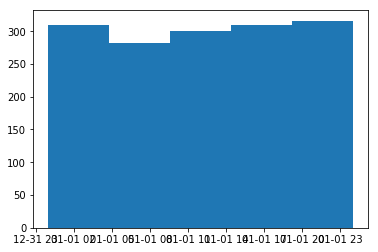

[-0.12144009  0.3275148 ]


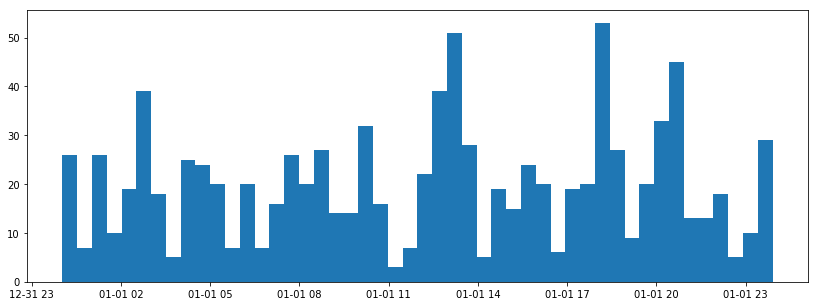

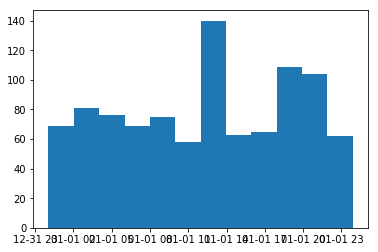

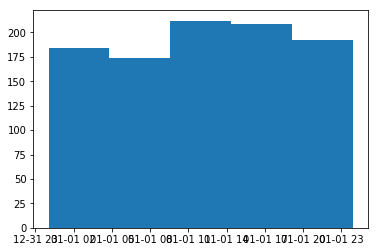

[ 0.94116602  0.89752275]


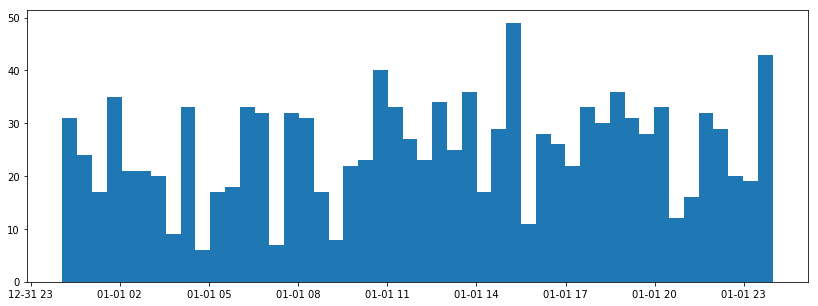

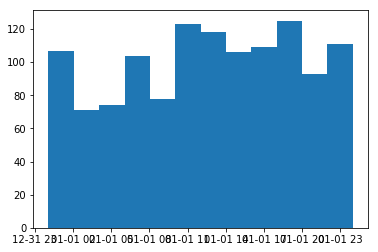

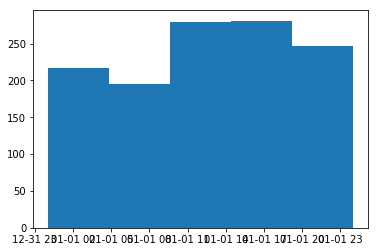

[ 0.37035595 -0.12870261]


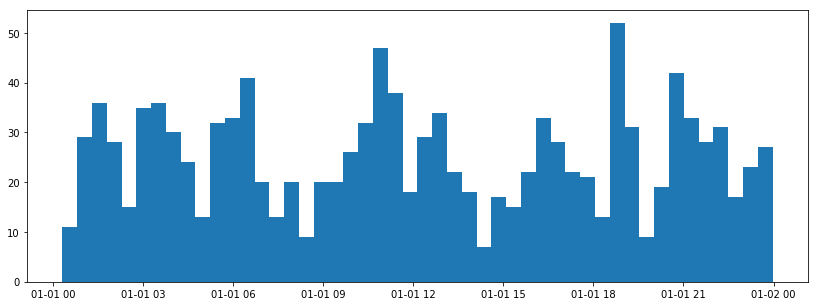

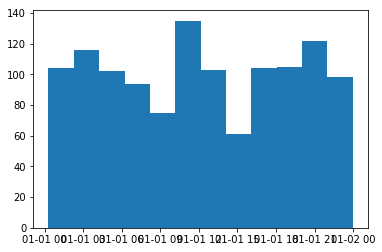

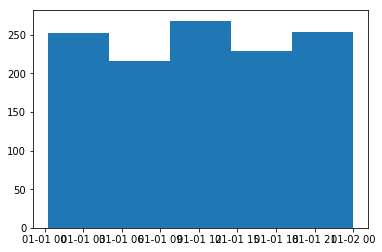

[-0.16072998 -0.22126277]


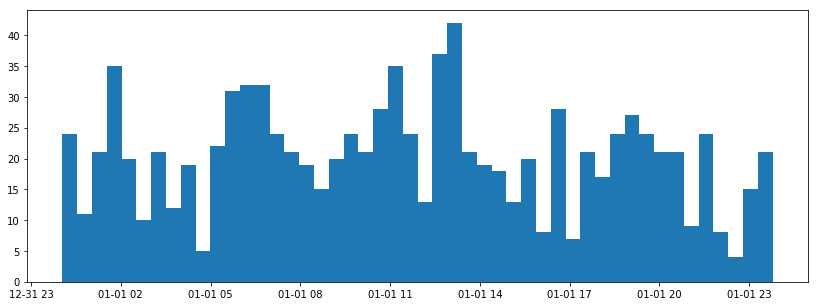

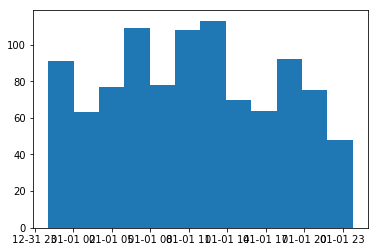

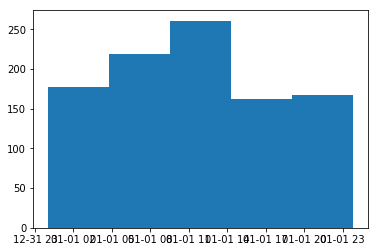

[ 0.2179461  -0.04084292]


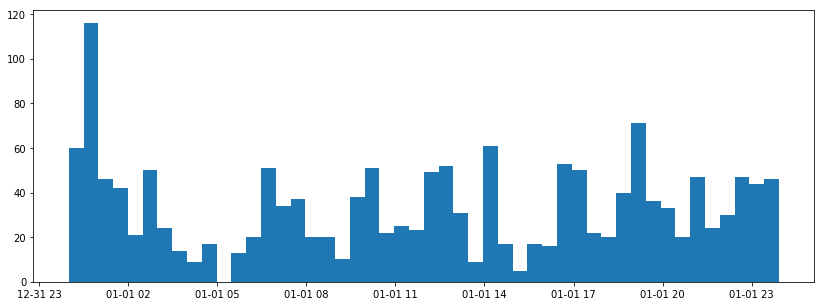

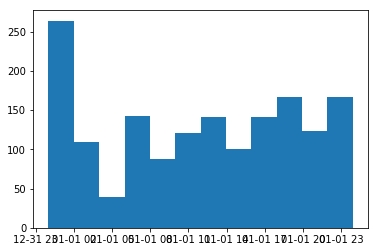

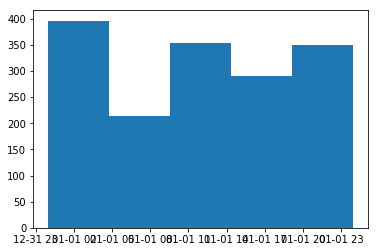

[ 0.60229604  1.02937116]


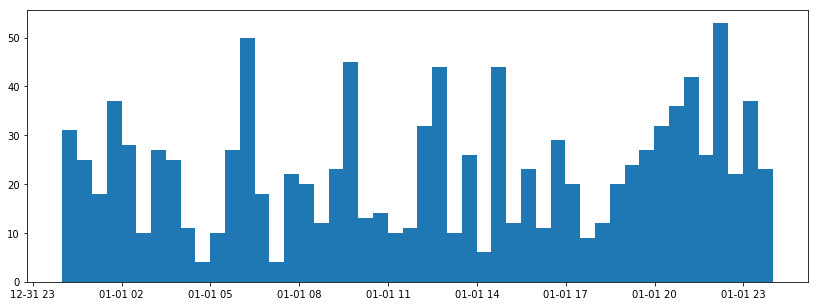

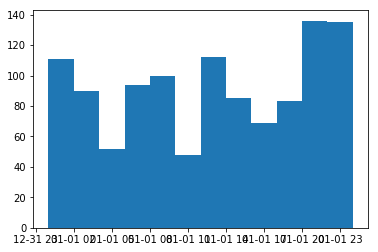

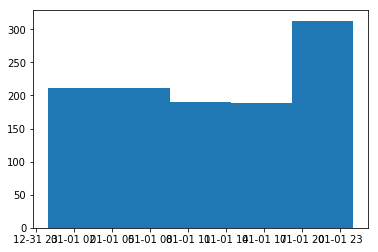

[ 0.24934742 -0.25020894]


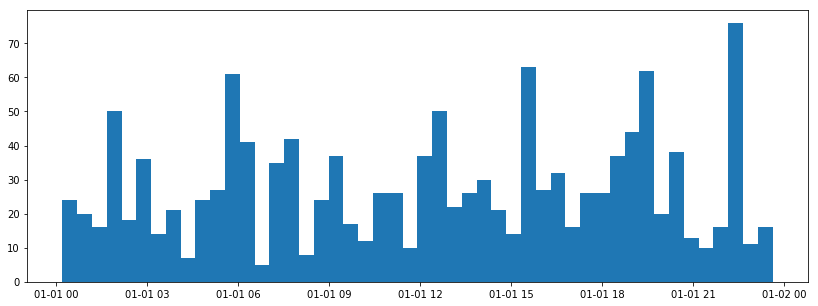

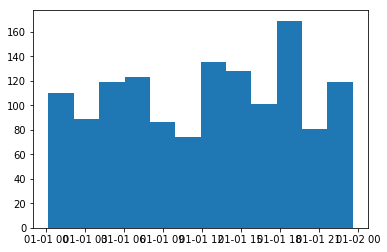

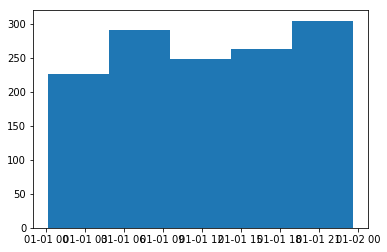

[ 0.84164082  1.16237725]


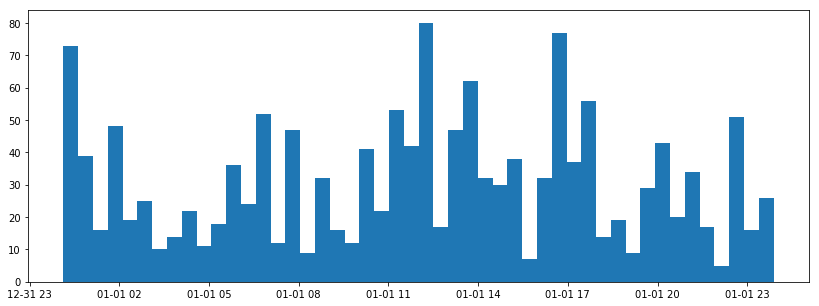

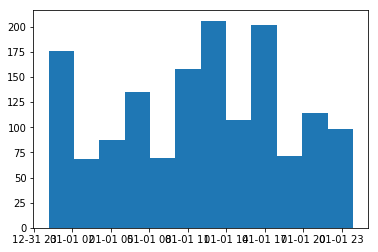

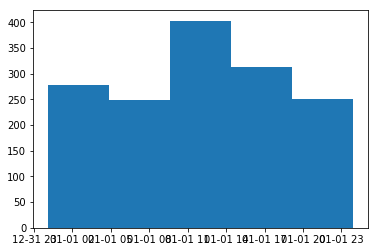

[ 0.97299631  0.73286055]


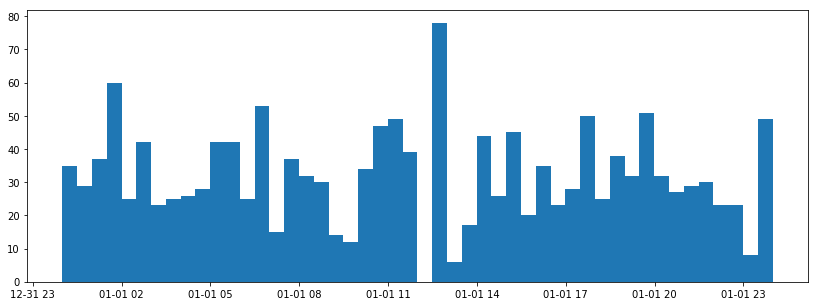

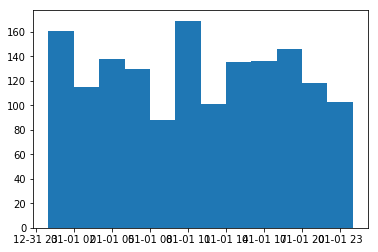

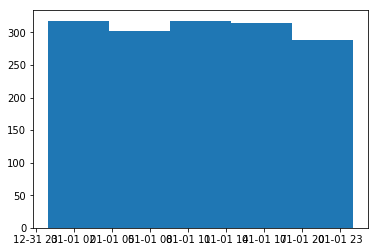

[-0.26257763  0.02409033]


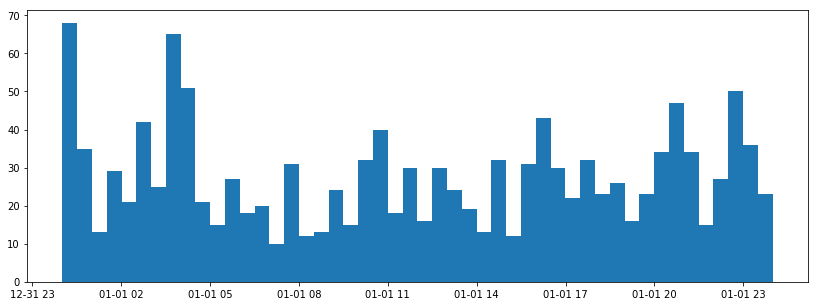

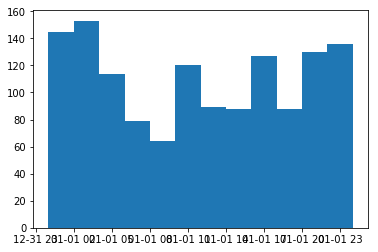

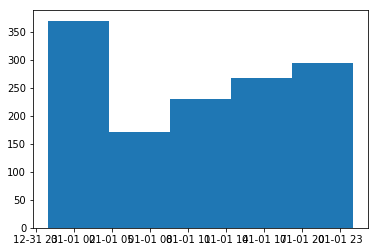

[-0.14856268  0.04881133]


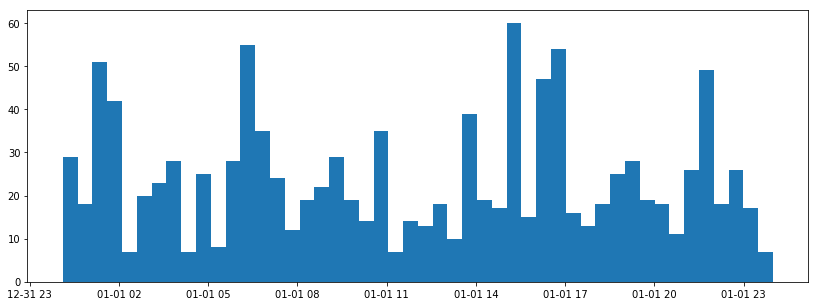

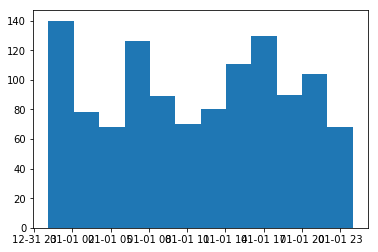

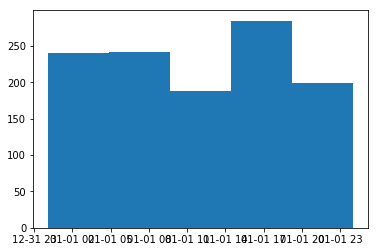

[ 0.95818464  1.29571618]


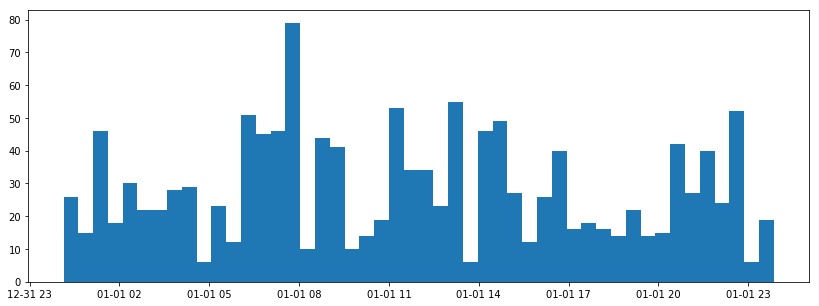

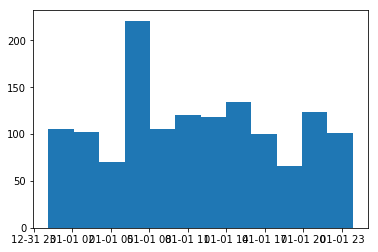

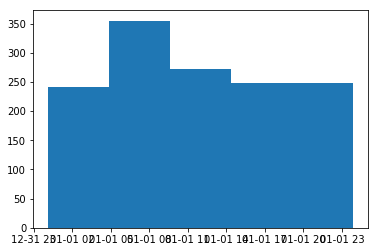

In [288]:
for i in range(19):
    plt.figure(figsize=(14,5))
    print(cluster_array[i])
    plt.hist(cc_time[i], bins=48)
    plt.show()
    plt.hist(cc_time[i], bins=12)
    plt.show()
    plt.hist(cc_time[i], bins=5)
    plt.show()

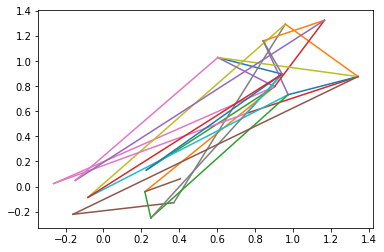

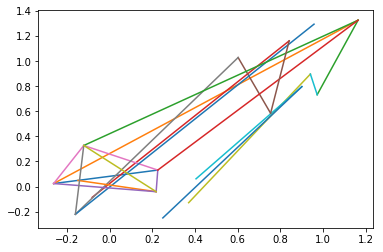

In [270]:
rr = np.abs(r_coeffs.copy())
highest_covariances = []
v = 1
while v > 0:
    z = np.argmax(rr)
    x = z // 19
    y = z % 19
    highest_covariances.append([r_coeffs[x, y], x, y])
    v = rr[x, y]
    rr[x, y] = 0

less = []
greater = []

for i in range(len(highest_covariances)):
    vs = highest_covariances[i]
    s1 = np_freqs[vs[1]]
    s2 = np_freqs[vs[2]]
    # print(str(cluster_array[vs[1]]) + ', ' + str(cluster_array[vs[2]])+ ', r = ' + str(vs[0]))
    if vs[0] < -.3:
        less.append(np.array([cluster_array[vs[1]], cluster_array[vs[2]]]).T)
    elif vs[0] > .3:
        greater.append(np.array([cluster_array[vs[1]], cluster_array[vs[2]]]).T)
    
    # plt.scatter(s1, s2)
    # plt.plot(np.unique(s1), np.poly1d(np.polyfit(s1, s2, 1))(np.unique(s1)))
    # plt.title('X: cluster ' + str(vs[1]) + ', Y: cluster ' + str(vs[2]) + ', r = ' + str(vs[0]))
    # plt.show()

for s in less:
    plt.plot(s[0], s[1])

plt.show()

for s in greater:
    plt.plot(s[0], s[1])
    
plt.show()

In [172]:
# user_ts

paths = np.zeros((19, 19) , dtype='int32')
user_paths = np.zeros((len(user_ts), 19, 19) , dtype='int32')

user_visits = np.zeros((len(user_ts), 19), dtype='int32')

for k in user_ts:
    ts = user_ts[k]
    for i in range(ts.shape[0]-1):
        prev = find_cluster(ts[i, 1:3], clusters)
        user_visits[int(k), prev] += 1
        nxt = find_cluster(ts[i+1, 1:3], clusters)
        user_paths[int(k), prev, nxt] += 1
        paths[prev, nxt] += 1
    user_visits[int(k), nxt] += 1
# print(paths)
# print(user_visits)

# for i in range(user_visits.shape[0]):
#     print(user_visits[i])

# print(user_paths[-1])
# print(paths)

path_ps_from_to = np.array(paths, dtype='float')
path_ps_to_from = np.array(paths, dtype='float')
for i in range(path_ps.shape[0]):
    path_ps_from_to[i] /= np.sum(path_ps_from_to[i])
    path_ps_to_from[:, i] /= np.sum(path_ps_to_from[:, i])

print(path_ps_from_to)
print(path_ps_to_from)

# user_path_ps = np.array(user_paths, dtype='float')
# for k in range(user_path_ps.shape[0]):
#     for i in range(user_path_ps.shape[1]):
#         user_path_ps[k, i] /= np.sum(user_path_ps[k, i])

# print(user_path_ps[0])

[[ 0.12241775  0.0558531   0.0283091   0.08569243  0.04361132  0.05049732
   0.06426932  0.03136955  0.02983933  0.03902066  0.03902066  0.05891354
   0.03366488  0.03289977  0.06579954  0.08722265  0.05049732  0.0420811
   0.03902066]
 [ 0.04831625  0.09004392  0.0329429   0.0761347   0.05856515  0.05490483
   0.05710102  0.03879941  0.0534407   0.02708638  0.0431918   0.0636896
   0.04099561  0.05417277  0.06734993  0.06149341  0.0329429   0.0556369
   0.0431918 ]
 [ 0.03528115  0.05402426  0.06394708  0.06174201  0.06835722  0.0463065
   0.05733186  0.04079383  0.0429989   0.04189636  0.04851158  0.05181918
   0.03528115  0.08158765  0.0429989   0.05071665  0.06504961  0.03858875
   0.07276736]
 [ 0.05756053  0.04659662  0.02969392  0.12882595  0.0571037   0.05527638
   0.05344906  0.04020101  0.04796711  0.0447693   0.03197807  0.06669712
   0.04202832  0.05619004  0.04659662  0.0571037   0.0525354   0.04751028
   0.03791686]
 [ 0.03909465  0.04595336  0.04526749  0.10013717  0.155

In [167]:
p_matrix_0 = np.zeros(19)
for k in range(user_visits.shape[0]):
    p_matrix_0 += np.array(user_visits[k] > 0, dtype='float')

p_matrix_0 /= user_visits.shape[0]

p_matrix_1 = np.zeros((19, 19))
for i in range(user_visits.shape[1]):
    for k in range(user_visits.shape[0]):
        if user_visits[k, i] != 0:
            p_matrix_1[i] += np.array(user_visits[k] > 0, dtype='float')
    p_matrix_1[i] /= p_matrix_1[i, i]

p_matrix_2 = np.zeros((19, 19))
for i in range(user_visits.shape[1]):
    for k in range(user_visits.shape[0]):
        if user_visits[k, i] == 0:
            p_matrix_2[i] += np.array(user_visits[k] > 0, dtype='float')
            p_matrix_2[i, i] += 1
    p_matrix_2[i] /= p_matrix_2[i, i]
    p_matrix_2[i, i] = 0
# print(p_matrix_0) 
# print(probability_matrix)
# for i in range(19):
#     print(np.array([p_matrix_0, p_matrix_1[i] - p_matrix_0, p_matrix_2[i] - p_matrix_0]).T)

[[ 0.52        0.48       -0.52      ]
 [ 0.72        0.03       -0.0325    ]
 [ 0.53       -0.03        0.0325    ]
 [ 0.66       -0.00615385  0.00666667]
 [ 0.49       -0.02846154  0.03083333]
 [ 0.59       -0.03230769  0.035     ]
 [ 0.65        0.08076923 -0.0875    ]
 [ 0.58        0.09307692 -0.10083333]
 [ 0.47        0.01076923 -0.01166667]
 [ 0.55       -0.01153846  0.0125    ]
 [ 0.46        0.00153846 -0.00166667]
 [ 0.64        0.05230769 -0.05666667]
 [ 0.6        -0.1         0.10833333]
 [ 0.72        0.01076923 -0.01166667]
 [ 0.71        0.13615385 -0.1475    ]
 [ 0.51        0.04769231 -0.05166667]
 [ 0.59       -0.09        0.0975    ]
 [ 0.61        0.04384615 -0.0475    ]
 [ 0.63        0.00461538 -0.005     ]]
[[ 0.52        0.02166667 -0.05571429]
 [ 0.72        0.28       -0.72      ]
 [ 0.53        0.02555556 -0.06571429]
 [ 0.66        0.02055556 -0.05285714]
 [ 0.49        0.03777778 -0.09714286]
 [ 0.59       -0.02055556  0.05285714]
 [ 0.65        0.0444444